In [1]:
# author: Fahim Tajwar
from label_loader import *
from image_loader import *
from util import *
from models import *
from model_trainer import *
from dataset import *

In [2]:
file_name_1 = '../data/labels_cells_only.xlsx'
file_name_2 = '../data/classes_800.xlsx'
file_names = [file_name_1, file_name_2]

label_reader = Label_Reader(file_names)
weight_vector = label_reader.get_weight_vector()
print(label_reader.get_all_labels())
print(label_reader.get_label_to_label_id_map())
print(weight_vector)

set(['cell dies', 'grows dense', 'grows sparse'])
{'cell dies': 0, 'grows dense': 1, 'grows sparse': 2}
tensor([0.0260, 0.0294, 0.0097])


In [3]:
prefix = "../data/well2_data/well"
suffix = "_well.png"

all_well_ids = label_reader.get_all_well_ids()
si = Single_Image_Loader(5, all_well_ids, prefix, suffix)
tensor = si.get_image_tensor()
well_id_to_image_id_map = si.get_well_to_image_id_map()
print(tensor.shape)
print(well_id_to_image_id_map)

torch.Size([351, 3, 224, 224])
{14: 243, 17: 248, 29: 265, 2082: 146, 42: 292, 2091: 147, 2094: 148, 2096: 149, 2099: 150, 52: 304, 2101: 151, 54: 308, 2107: 152, 62: 323, 2111: 153, 2114: 154, 67: 328, 68: 330, 2122: 155, 75: 341, 2124: 156, 2134: 157, 2135: 158, 2137: 159, 91: 348, 96: 349, 98: 350, 2147: 160, 100: 236, 101: 237, 111: 238, 360: 278, 2164: 161, 121: 239, 2751: 213, 128: 240, 2179: 162, 134: 241, 136: 242, 2193: 163, 2194: 164, 2199: 165, 153: 244, 159: 245, 2210: 166, 2215: 167, 169: 247, 2227: 168, 2228: 169, 183: 249, 187: 250, 2239: 171, 197: 251, 2249: 172, 202: 253, 2253: 173, 206: 254, 221: 255, 2278: 174, 2285: 175, 242: 256, 2291: 176, 250: 257, 2299: 177, 255: 258, 257: 259, 269: 260, 272: 261, 275: 262, 278: 263, 286: 264, 2337: 178, 292: 266, 2342: 179, 295: 267, 2344: 180, 2346: 181, 2351: 182, 307: 268, 2360: 183, 2361: 184, 317: 269, 2368: 185, 321: 270, 325: 271, 326: 272, 329: 273, 331: 274, 2387: 186, 2388: 187, 2389: 188, 2393: 189, 347: 275, 2397: 1

In [4]:
input_size = 3 * 224 * 224
num_classes = 3

label_to_label_id = label_reader.label_to_label_id
label_id_to_label_map = label_reader.get_label_id_to_label_map()
#print(label_id_to_label_map)

Y_label = label_reader.get_label_map()
for key in Y_label:
    Y_label[key] = label_to_label_id[Y_label[key]]

print(Y_label)

label_id_train, label_id_val, label_id_test = get_dataset_split(Y_label)
print(len(label_id_train))
print(label_id_train)
print(len(label_id_val))
print(len(label_id_train))

{14: 2, 17: 0, 29: 2, 2082: 2, 42: 0, 2091: 2, 2094: 1, 2096: 0, 2099: 0, 52: 2, 2101: 2, 54: 1, 2107: 0, 62: 1, 2111: 2, 2114: 2, 67: 2, 68: 0, 2122: 2, 75: 1, 2124: 1, 2134: 1, 2135: 2, 2137: 2, 91: 2, 96: 0, 98: 2, 2147: 0, 100: 0, 101: 2, 111: 2, 360: 2, 2164: 1, 121: 0, 2751: 2, 128: 2, 2179: 2, 134: 2, 136: 0, 2193: 2, 2194: 2, 2199: 1, 153: 2, 159: 2, 2210: 2, 2215: 2, 169: 2, 2227: 2, 2228: 1, 183: 2, 187: 2, 2239: 2, 197: 2, 2249: 2, 202: 2, 2253: 1, 206: 1, 221: 0, 2278: 2, 2285: 0, 242: 1, 2291: 2, 250: 1, 2299: 2, 255: 0, 257: 0, 269: 2, 272: 1, 275: 2, 278: 2, 286: 2, 2337: 2, 292: 1, 2342: 1, 295: 1, 2344: 2, 2346: 0, 2351: 2, 307: 1, 2360: 2, 2361: 2, 317: 2, 2368: 2, 321: 1, 325: 0, 326: 1, 329: 1, 331: 2, 2387: 0, 2388: 1, 2389: 2, 2393: 1, 347: 2, 2397: 2, 355: 2, 358: 2, 2408: 2, 2414: 2, 2417: 2, 371: 0, 374: 0, 2424: 2, 381: 1, 383: 1, 384: 1, 387: 1, 389: 1, 2438: 2, 391: 2, 399: 0, 412: 2, 413: 2, 418: 2, 419: 2, 424: 2, 434: 2, 2484: 2, 450: 1, 451: 2, 2501: 1, 

In [5]:
training_set = Augmented_Dataset(tensor, label_id_train, Y_label, well_id_to_image_id_map, 
                                 None)
validation_set = Augmented_Dataset(tensor, label_id_val, Y_label, well_id_to_image_id_map, None)
test_set = Augmented_Dataset(tensor, label_id_test, Y_label, well_id_to_image_id_map, None)

In [6]:
training_batch_size = 320
validation_batch_size = 1
test_batch_size = 1
learning_rate = 0.001

validation_loader = torch.utils.data.DataLoader(dataset = validation_set, 
                                          batch_size = validation_batch_size, 
                                          shuffle = False)
test_loader = torch.utils.data.DataLoader(dataset = test_set, 
                                          batch_size = test_batch_size, 
                                          shuffle = False)

In [7]:
conv_net_1 = Our2DConvNetDesign1(num_classes = 3)
model_1 = Model(conv_net_1, training_set, training_batch_size, learning_rate, label_id_to_label_map, 
              weight = weight_vector, imbalanced_class = True, num_epochs = 30, verbose = True)

Epoch: [1/30], Loss: 1.2033
Epoch: [2/30], Loss: 1.3086
Epoch: [3/30], Loss: 1.7142
Epoch: [4/30], Loss: 1.4621
Epoch: [5/30], Loss: 1.6762
Epoch: [6/30], Loss: 1.5101
Epoch: [7/30], Loss: 1.3555
Epoch: [8/30], Loss: 1.6665
Epoch: [9/30], Loss: 1.1852
Epoch: [10/30], Loss: 1.3518
Epoch: [11/30], Loss: 1.4817
Epoch: [12/30], Loss: 1.2062
Epoch: [13/30], Loss: 1.3260
Epoch: [14/30], Loss: 1.3091
Epoch: [15/30], Loss: 1.2116
Epoch: [16/30], Loss: 1.2694
Epoch: [17/30], Loss: 1.1802
Epoch: [18/30], Loss: 1.2031
Epoch: [19/30], Loss: 1.1565
Epoch: [20/30], Loss: 1.1535
Epoch: [21/30], Loss: 1.1205
Epoch: [22/30], Loss: 1.1124
Epoch: [23/30], Loss: 1.0822
Epoch: [24/30], Loss: 1.0753
Epoch: [25/30], Loss: 1.0454
Epoch: [26/30], Loss: 1.0402
Epoch: [27/30], Loss: 1.0106
Epoch: [28/30], Loss: 1.0072
Epoch: [29/30], Loss: 0.9774
Epoch: [30/30], Loss: 0.9758
Training done!


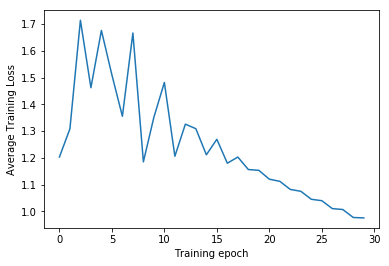

accuracy : 50.000000

('Frequency per class: ', {'cell dies': 63, 'grows dense': 53, 'grows sparse': 164})


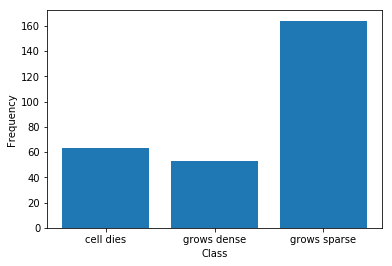

('Number of datapoints we got correct per class', {'cell dies': 10, 'grows dense': 52, 'grows sparse': 79})
('Accuracy per class', {'cell dies': 0.15873015873015872, 'grows dense': 0.9811320754716981, 'grows sparse': 0.4817073170731707})


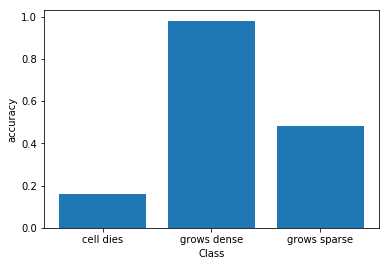

0.07501880948728624

In [8]:
model_1.train()

accuracy : 51.000000

('Frequency per class: ', {'cell dies': 9, 'grows dense': 5, 'grows sparse': 21})


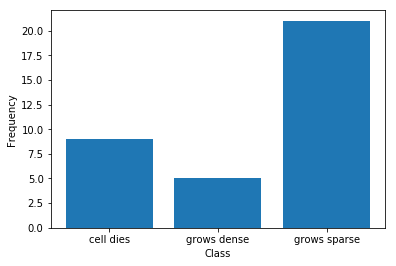

('Number of datapoints we got correct per class', {'cell dies': 2, 'grows dense': 4, 'grows sparse': 12})
('Accuracy per class', {'cell dies': 0.2222222222222222, 'grows dense': 0.8, 'grows sparse': 0.5714285714285714})


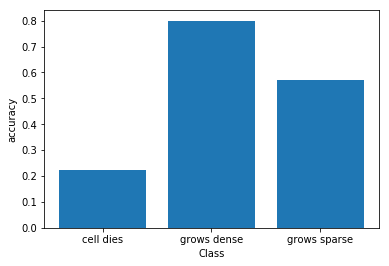

In [9]:
err = model_1.test(validation_loader)

accuracy : 40.000000

('Frequency per class: ', {'cell dies': 9, 'grows dense': 4, 'grows sparse': 22})


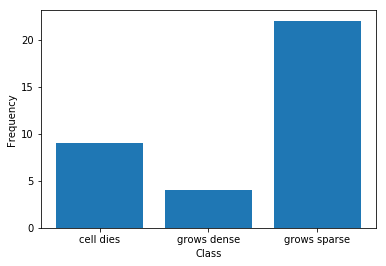

('Number of datapoints we got correct per class', {'cell dies': 2, 'grows dense': 4, 'grows sparse': 8})
('Accuracy per class', {'cell dies': 0.2222222222222222, 'grows dense': 1.0, 'grows sparse': 0.36363636363636365})


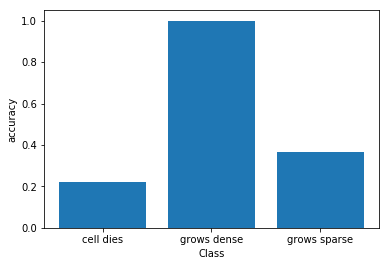

0.0808080808080808

In [10]:
model_1.test(test_loader)

accuracy : 40.000000

('Frequency per class: ', {'cell dies': 9, 'grows dense': 4, 'grows sparse': 22})


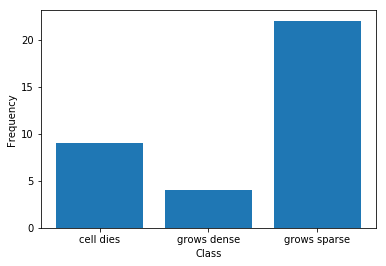

('Number of datapoints we got correct per class', {'cell dies': 2, 'grows dense': 4, 'grows sparse': 8})
('Accuracy per class', {'cell dies': 0.2222222222222222, 'grows dense': 1.0, 'grows sparse': 0.36363636363636365})


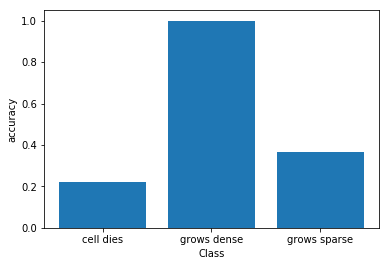

7
14


In [11]:
err = model_1.get_error_analysis(test_loader)
for i in err:
    print(len(err[i]))

1


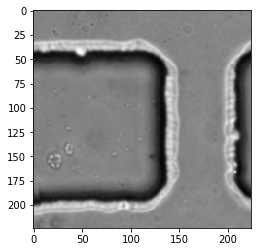

1


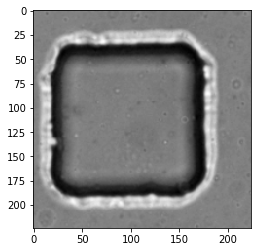

1


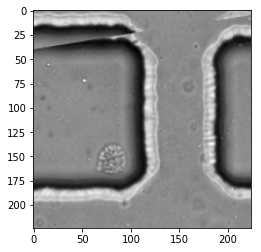

1


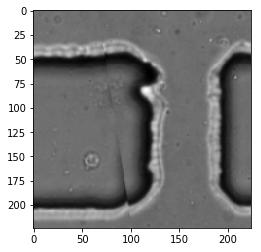

1


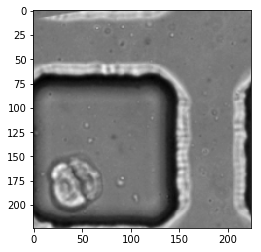

1


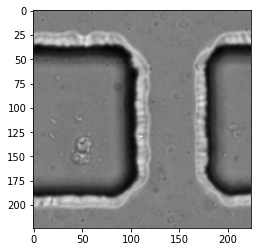

1


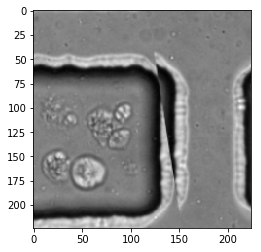

1


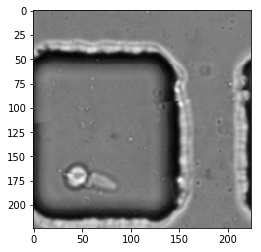

1


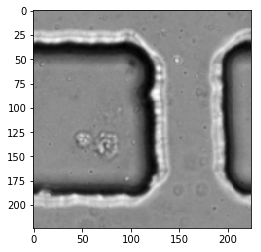

1


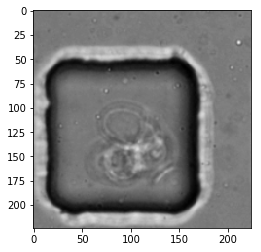

1


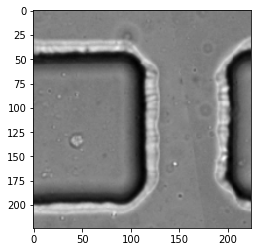

1


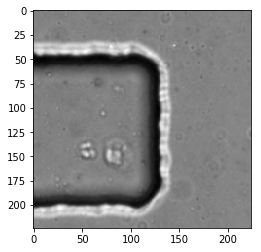

1


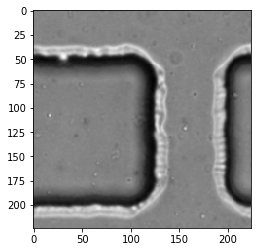

1


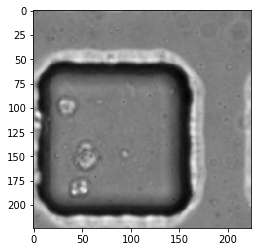

In [12]:
for prediction, image in err[2]:
    print(prediction)
    show_tensor_as_image(image)